In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [2]:
import os

base_dir = '/workspaces/Recycle-It-Gradio-App/data'
classes = os.listdir(base_dir)

# .DS_Store gibi gizli sistem dosyalarını listeden çıkaralım
classes = [c for c in classes if not c.startswith('.')]

print("Sınıflar (Kategoriler):", classes)
print("Toplam sınıf sayısı:", len(classes))

Sınıflar (Kategoriler): ['trash', 'metal', 'glass', 'cardboard', 'paper', 'plastic']
Toplam sınıf sayısı: 6


In [3]:
class_counts = {}
for class_name in classes:
    class_path = os.path.join(base_dir, class_name)
    class_counts[class_name] = len(os.listdir(class_path))

# Sonuçları daha güzel görmek için bir Pandas DataFrame'e çevirelim.
counts_df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Image Count'])
counts_df = counts_df.sort_values(by='Image Count', ascending=False)

print("\nHer sınıftaki resim sayısı:")
print(counts_df)


Her sınıftaki resim sayısı:
       Class  Image Count
4      paper          594
2      glass          501
5    plastic          482
1      metal          410
3  cardboard          403
0      trash          137


/tmp/ipykernel_37291/2054394617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Image Count', y='Class', data=counts_df, palette='viridis')


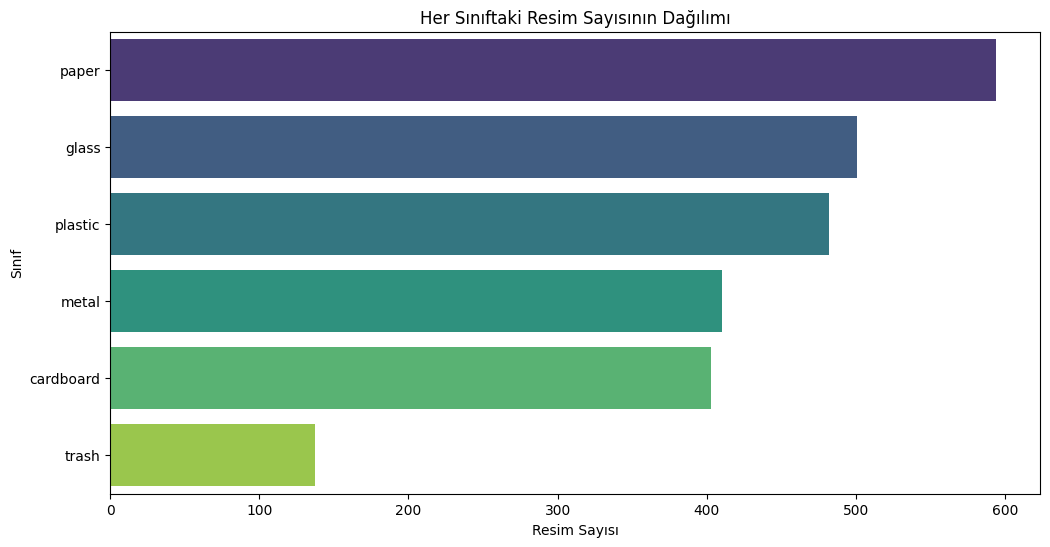

In [4]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Image Count', y='Class', data=counts_df, palette='viridis')
plt.title('Her Sınıftaki Resim Sayısının Dağılımı')
plt.xlabel('Resim Sayısı')
plt.ylabel('Sınıf')
plt.show()


Her sınıftan rastgele birer örnek resim:


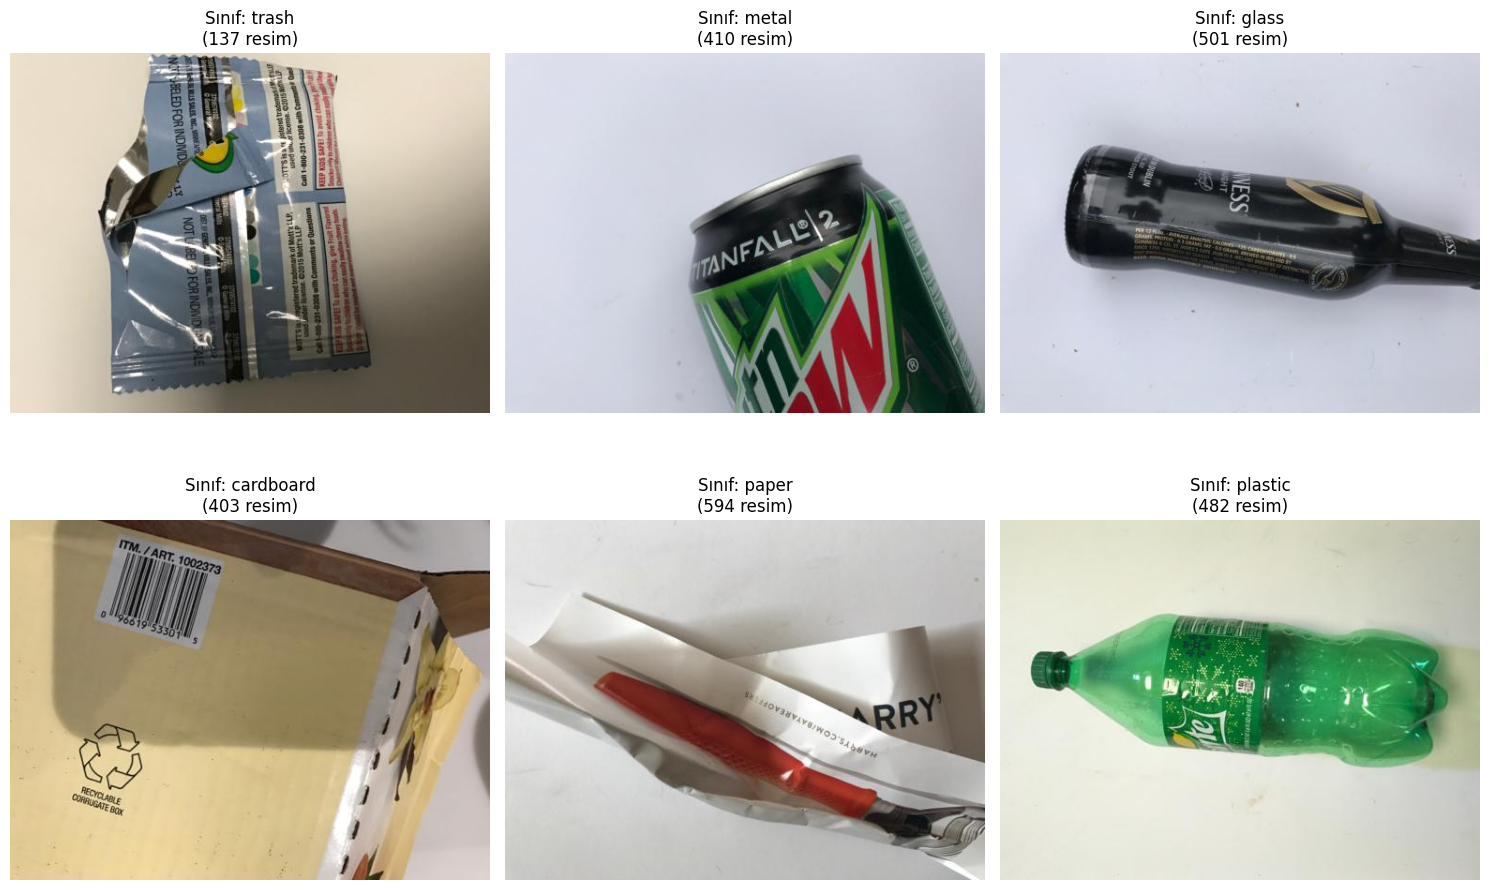

In [5]:
print("\nHer sınıftan rastgele birer örnek resim:")

# 2x3'lük bir görsel alanı oluşturalım (6 sınıfımız olduğu için)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten() # 2x3'lük matrisi tek boyutlu bir diziye çevirelim

for i, class_name in enumerate(classes):
    class_path = os.path.join(base_dir, class_name)
    # Klasördeki ilk resmin adını alalım
    sample_image_name = os.listdir(class_path)[0]
    sample_image_path = os.path.join(class_path, sample_image_name)
    
    # Resmi açalım
    img = Image.open(sample_image_path)
    
    # Resmi ilgili alt grafiğe çizelim
    axes[i].imshow(img)
    axes[i].set_title(f'Sınıf: {class_name}\n({counts_df.loc[counts_df.Class == class_name, "Image Count"].values[0]} resim)')
    axes[i].axis('off')

plt.tight_layout()
plt.show()